# Feature Dictionaries

- `FAVC`: Frequent consumption of high caloric food
- `FCVC`: Frequency of consumption of vegetables
- `NCP`: Number of main meals
- `CAEC`: Consumption of food between meals
- `CH20`: Consumption of water daily 
- `CALC`: Consumption of alcohol
- `SCC`: Calories consumption monitoring
- `FAF`: Physical activity frequency
- `TUE`: Time using technology devices
- `MTRANS`: Transportation used

# Imports

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats
from scipy.stats import chi2_contingency, levene, shapiro, ttest_ind, kruskal

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
submission_df = pd.read_csv('sample_submission.csv')

In [3]:
train_df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
test_df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [5]:
submission_df.head()

,id,NObeyesdad
0,20758,Normal_Weight
1,20759,Normal_Weight
2,20760,Normal_Weight
3,20761,Normal_Weight
4,20762,Normal_Weight


In [6]:
# examine the datasets
dfs = [train_df, test_df, submission_df]

for df in dfs:
    print('\n')
    print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                           

In [7]:
train_df.drop(columns='id').describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
Age,20758.000000,23.841804,5.688072,14.000000,20.000000,22.815416,26.000000,61.000000
Height,20758.000000,1.700245,0.087312,1.450000,1.631856,1.700000,1.762887,1.975663
Weight,20758.000000,87.887768,26.379443,39.000000,66.000000,84.064875,111.600553,165.057269
FCVC,20758.000000,2.445908,0.533218,1.000000,2.000000,2.393837,3.000000,3.000000
NCP,20758.000000,2.761332,0.705375,1.000000,3.000000,3.000000,3.000000,4.000000
CH2O,20758.000000,2.029418,0.608467,1.000000,1.792022,2.000000,2.549617,3.000000
FAF,20758.000000,0.981747,0.838302,0.000000,0.008013,1.000000,1.587406,3.000000
TUE,20758.000000,0.616756,0.602113,0.000000,0.000000,0.573887,1.000000,2.000000


In [8]:
test_df.drop(columns='id').describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
Age,13840.000000,23.952740,5.799814,14.000000,20.000000,22.906342,26.000000,61.000000
Height,13840.000000,1.698934,0.088761,1.450000,1.631662,1.700000,1.760710,1.980000
Weight,13840.000000,87.384504,26.111819,39.000000,65.000000,83.952968,111.157811,165.057269
FCVC,13840.000000,2.442898,0.531606,1.000000,2.000000,2.358087,3.000000,3.000000
NCP,13840.000000,2.750610,0.710927,1.000000,3.000000,3.000000,3.000000,4.000000
CH2O,13840.000000,2.032044,0.611230,1.000000,1.771781,2.000000,2.552388,3.000000
FAF,13840.000000,0.974532,0.840361,0.000000,0.001086,1.000000,1.571865,3.000000
TUE,13840.000000,0.611033,0.608005,0.000000,0.000000,0.552498,1.000000,2.000000


# Check for Nulls

In [9]:
print(f'There are {train_df.isna().any().sum()} nulls in train set.')
print(f'There are {test_df.isna().any().sum()} nulls in test set.')

There are 0 nulls in train set.
There are 0 nulls in test set.


# Duplicates

`id` column only contains unique identifiers for each person, it should excluded when checking for duplicates.

In [10]:
train_df.drop(columns='id').columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [11]:
print(f"There are {train_df.duplicated(subset=train_df.drop(columns='id').columns).sum()} duplicated data in the train set.")
print(f"There are {test_df.duplicated(subset=test_df.drop(columns='id').columns).sum()} duplicated data in the test set.")

There are 0 duplicated data in the train set.
There are 0 duplicated data in the test set.


# Remove Redudent Column

In [12]:
# drop `id` column
train_df.drop(columns='id',inplace=True)
test_df.drop(columns='id',inplace=True)

# EDA

## Univariate Analysis

### Target Analysis

In [13]:
counts_target = train_df['NObeyesdad'].value_counts()
counts_target

Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: NObeyesdad, dtype: int64

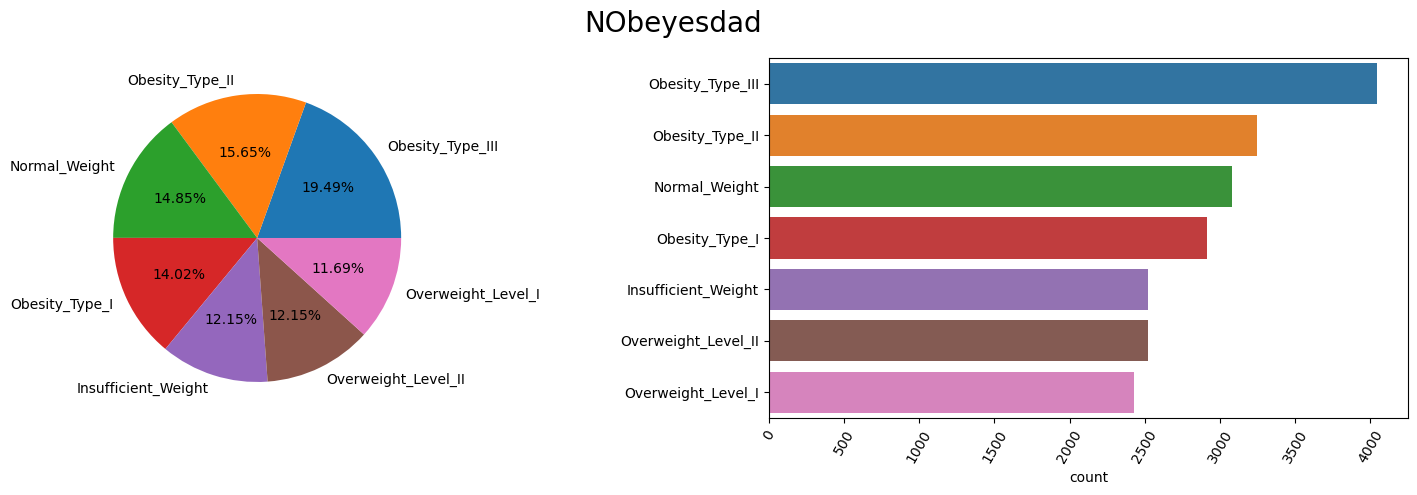

In [14]:
feature = 'NObeyesdad'

plt.subplots(1, 2,figsize=(15,5))

plt.subplot(1,2,1)
plt.pie(counts_target,
        labels=counts_target.index,
        autopct='%.2f%%')

plt.subplot(1,2,2)
sns.countplot(data=train_df,
              y=feature,
              order=counts_target.index,
              orient='h')
plt.xticks(rotation=60)
plt.ylabel('')

plt.suptitle('NObeyesdad',fontsize=20)

plt.tight_layout()
plt.show()

Obeisity_Type_III is the most dominant class in the dataset. There are least number of people with Overweight_Level_I. Other than this, we have a pretty balanced target class.

### Categorical Features

In [15]:
cat_features = train_df.drop(columns='NObeyesdad').select_dtypes(include='object').columns
cat_features

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object')

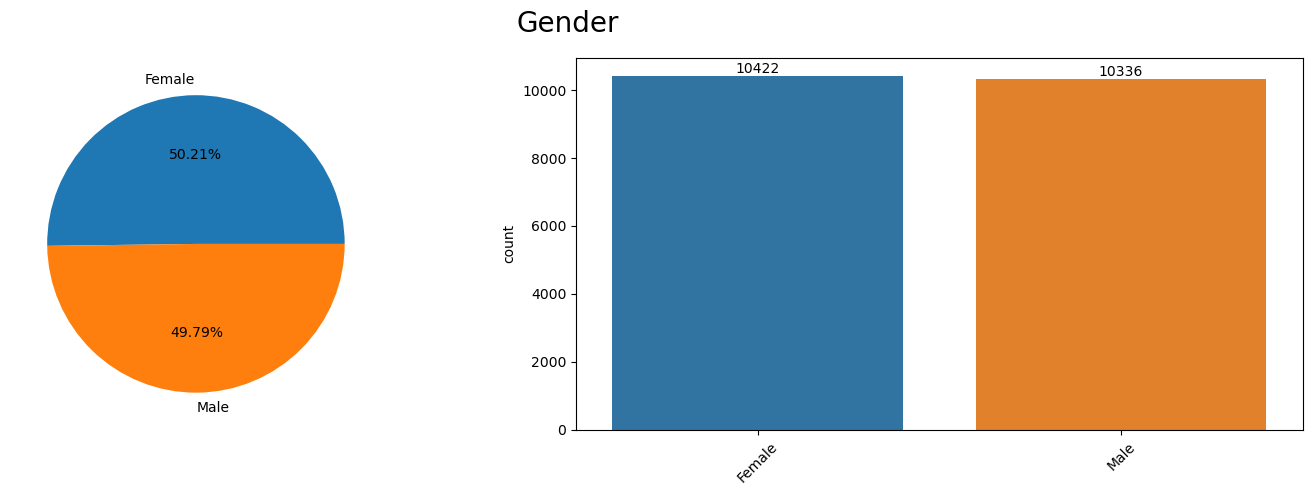

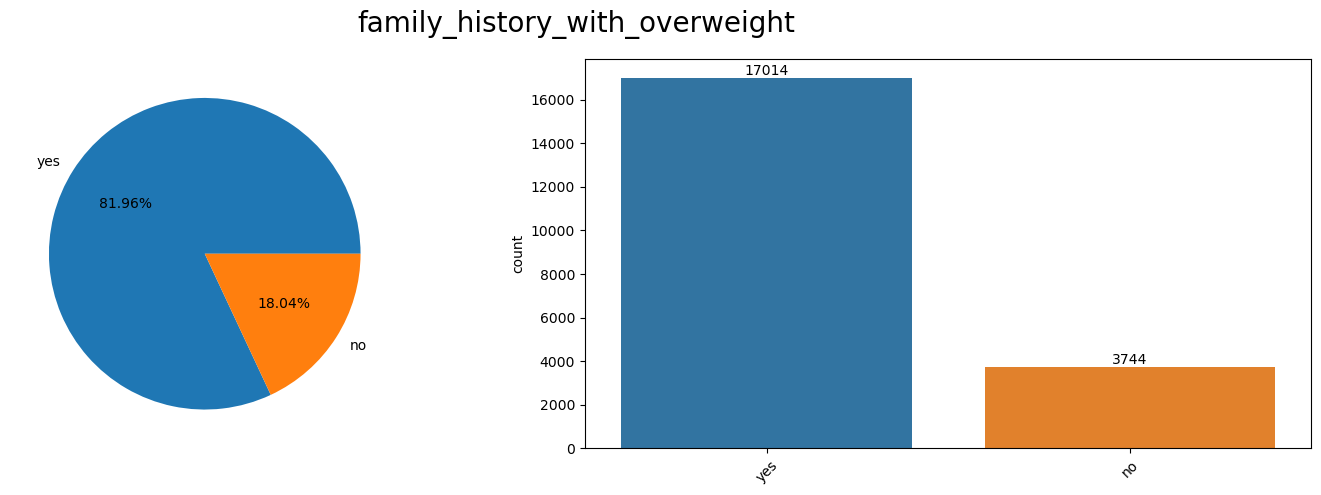

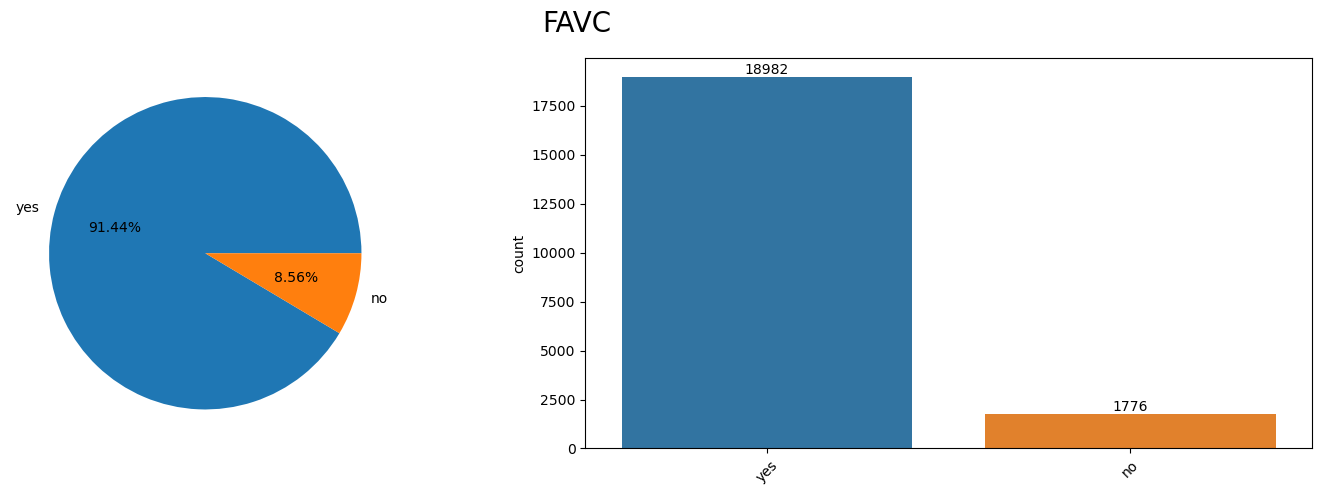

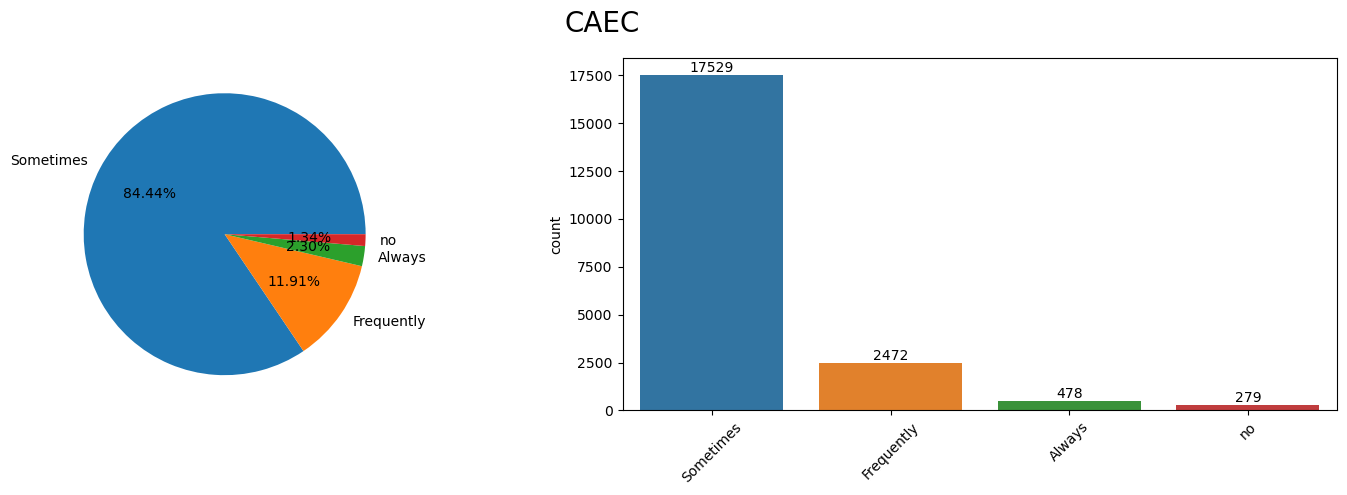

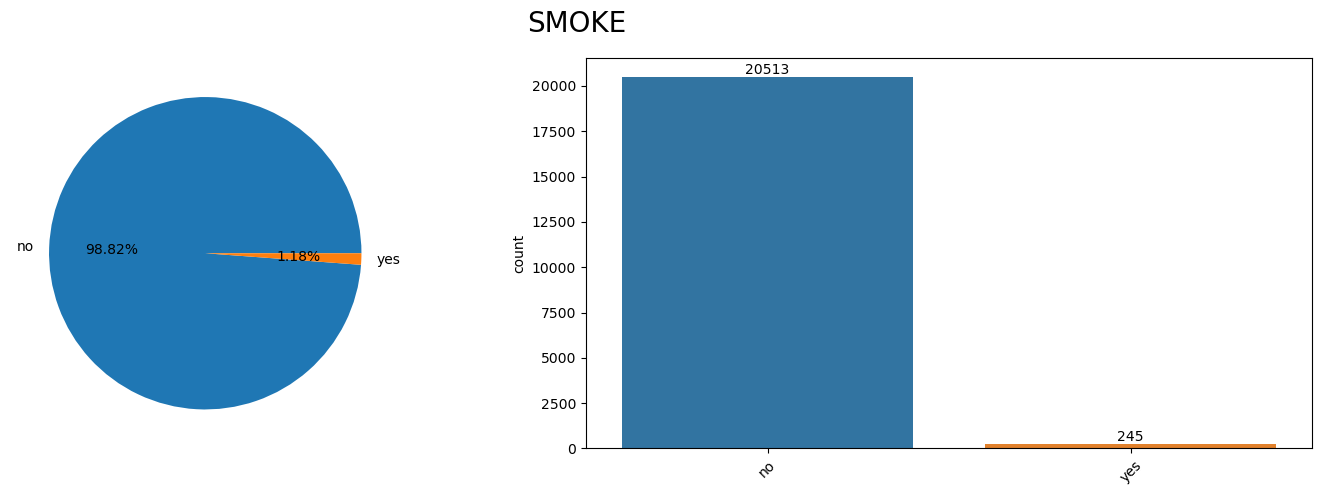

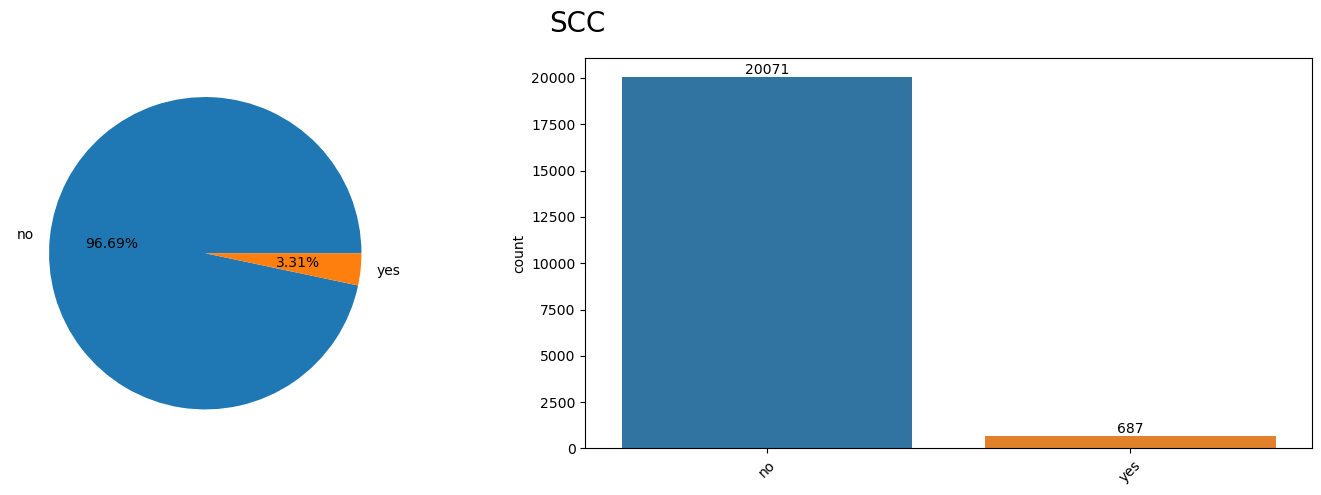

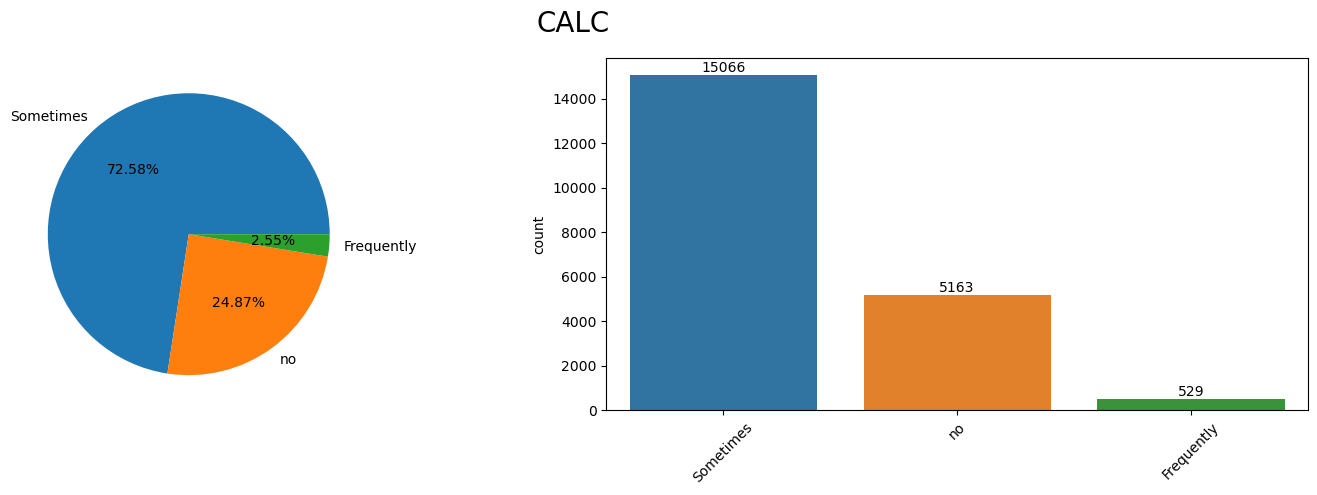

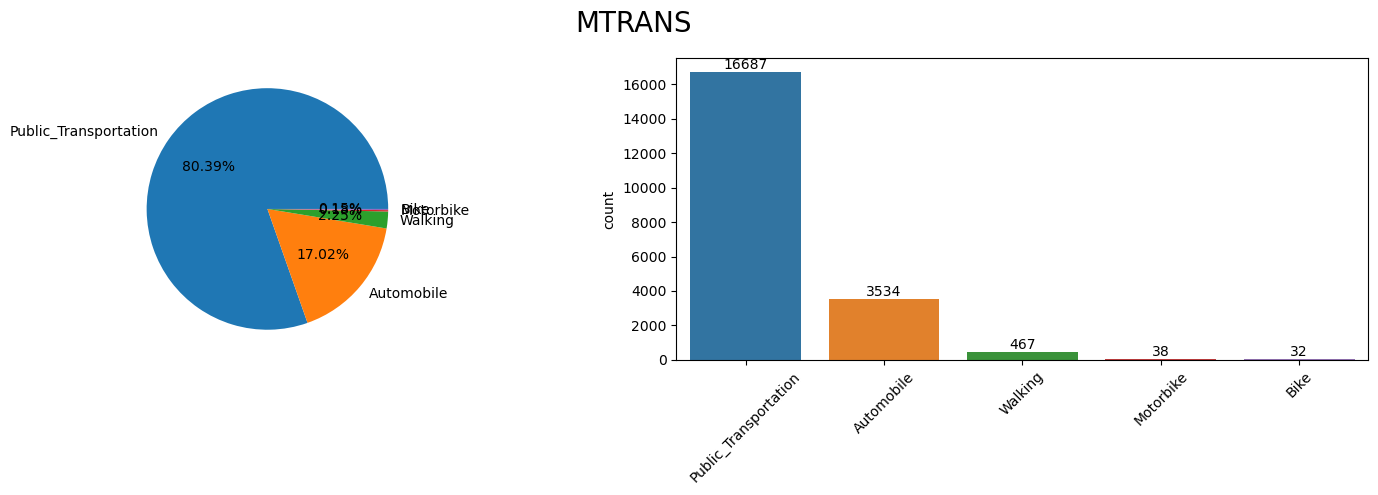

In [16]:
for col in cat_features:
    
    counts = train_df[col].value_counts()
    
    plt.subplots(1,2,figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.pie(counts,
            labels=counts.index,
            autopct='%.2f%%')
    
    plt.subplot(1,2,2)
    ax = sns.countplot(data=train_df,
                  x=col,
                  order=counts.index)
    plt.xticks(rotation=45)
    plt.xlabel('')
    
    # add numbers to the countplots
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', 
                    va='center', 
                    xytext=(0,5), 
                    textcoords='offset points')

    plt.suptitle(f'{col}',fontsize=20)
    
    plt.tight_layout()
    plt.show()

- Two genders are fairly sampled in this survey, there are slightly more women than men
- 82% of people have a family history of some kind of overweight
- 91.4% of people frequently consume high caloric food
- 84.4% of people sometimes consumes food between their meals, and 1.3% of people do not consume any food between meals
- Only 1.2% of people are smokers
- 3.3% of people monitor their caloric intake
- 72.6% of people sometimes consume alcohol, and 2.6% frequently drinks
- 80.4% of people use some forms of public transportation, and only 2.4% perfers physical activities as way of transportation (walking or biking)

### Numerical Features

In [17]:
num_features = train_df.drop(columns='NObeyesdad').select_dtypes(include='number').columns
num_features

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

Only `Age`, `Height`, and `Weight` are normally distributed with some skewness.

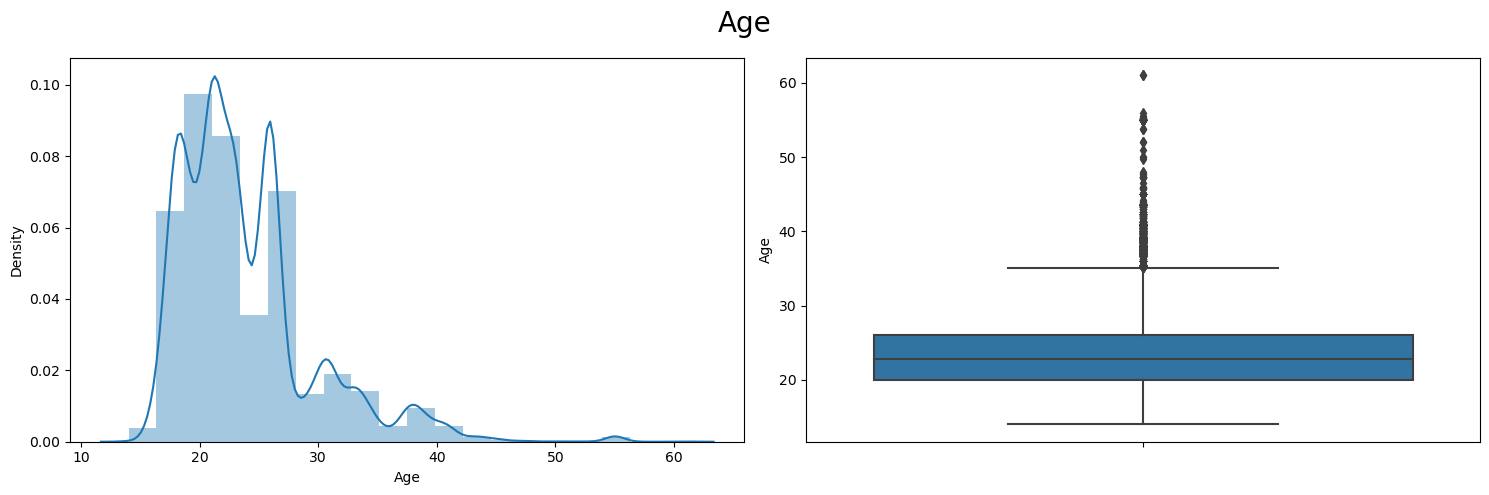

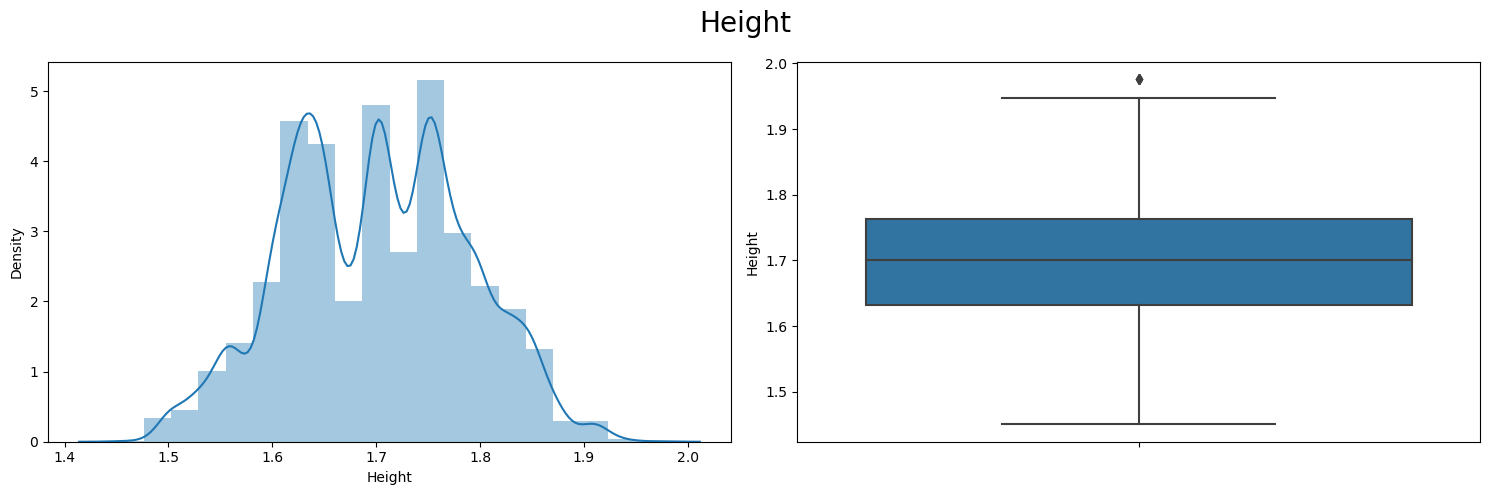

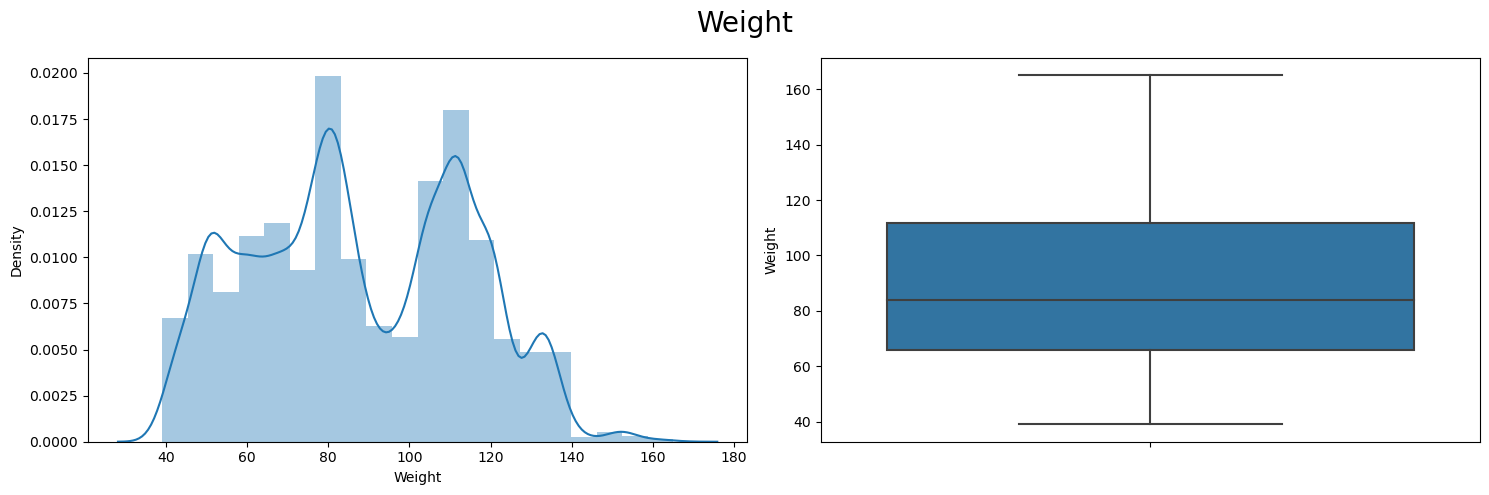

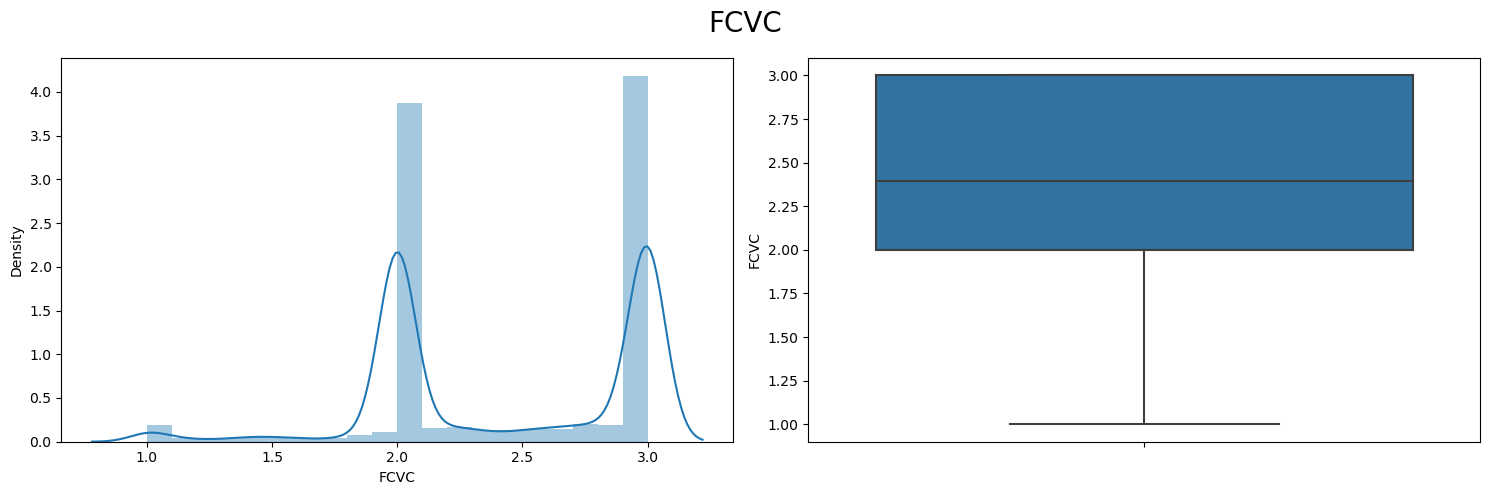

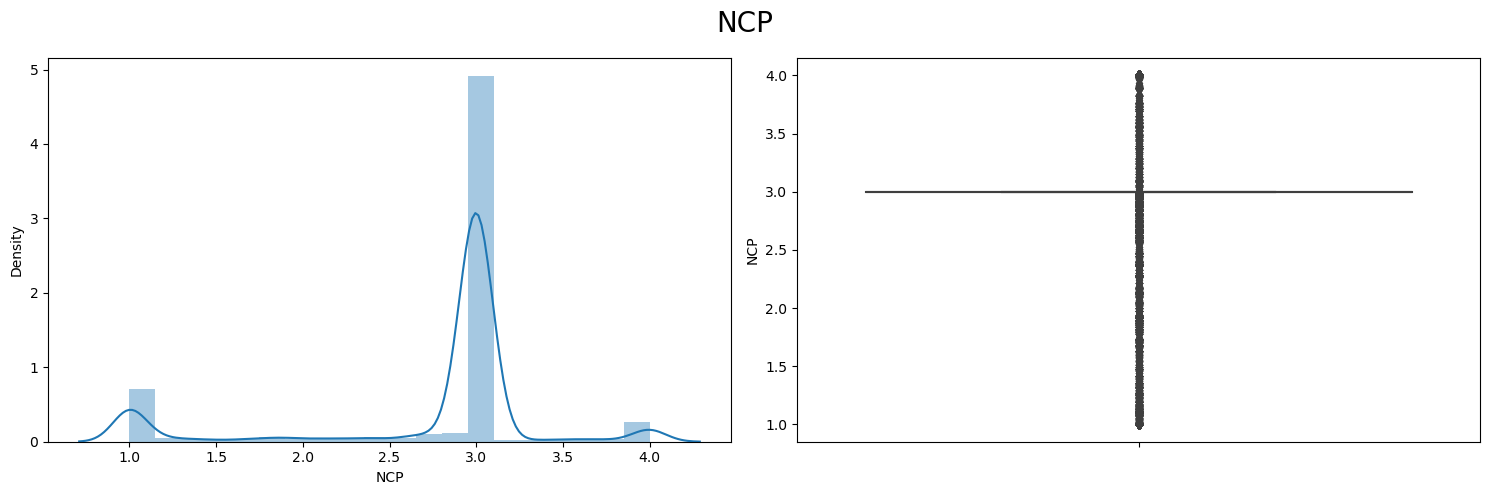

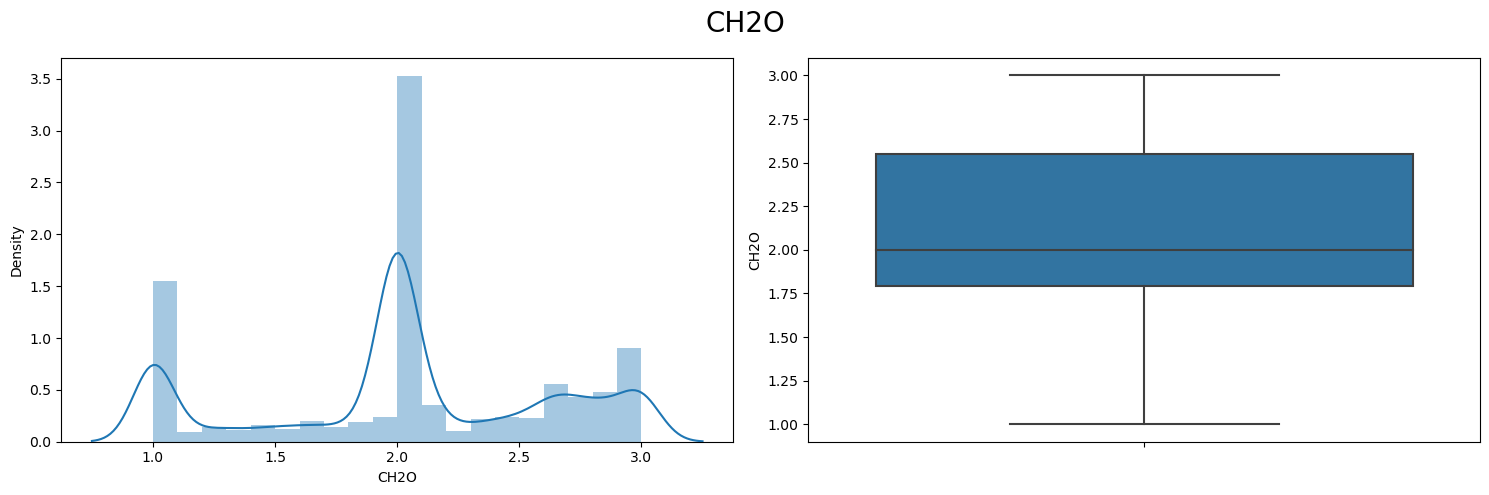

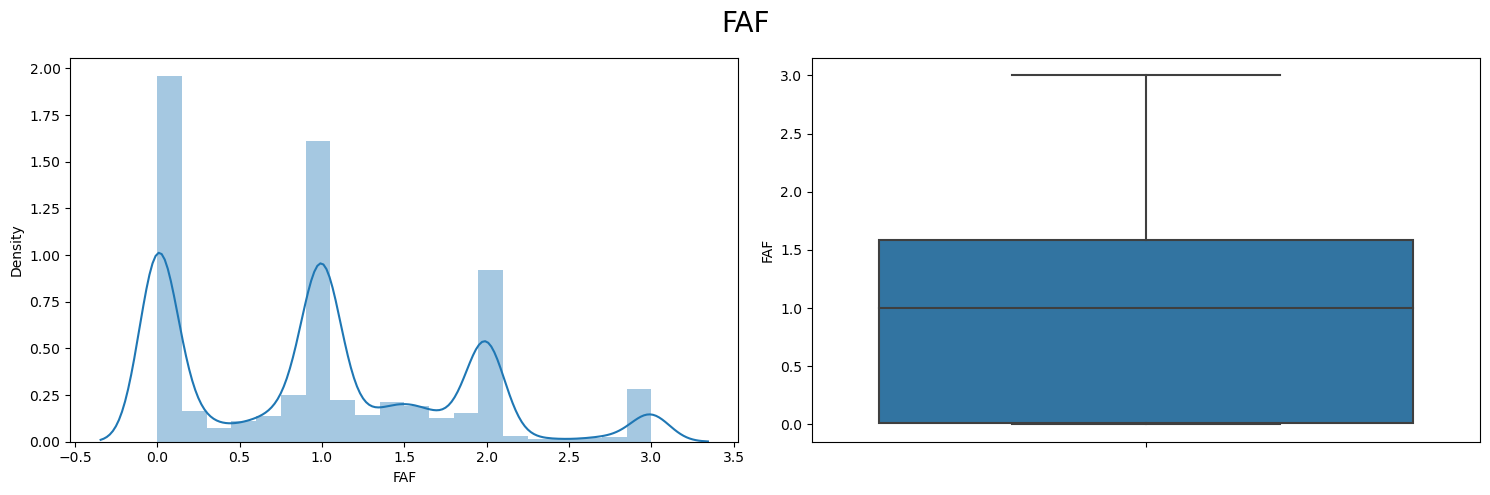

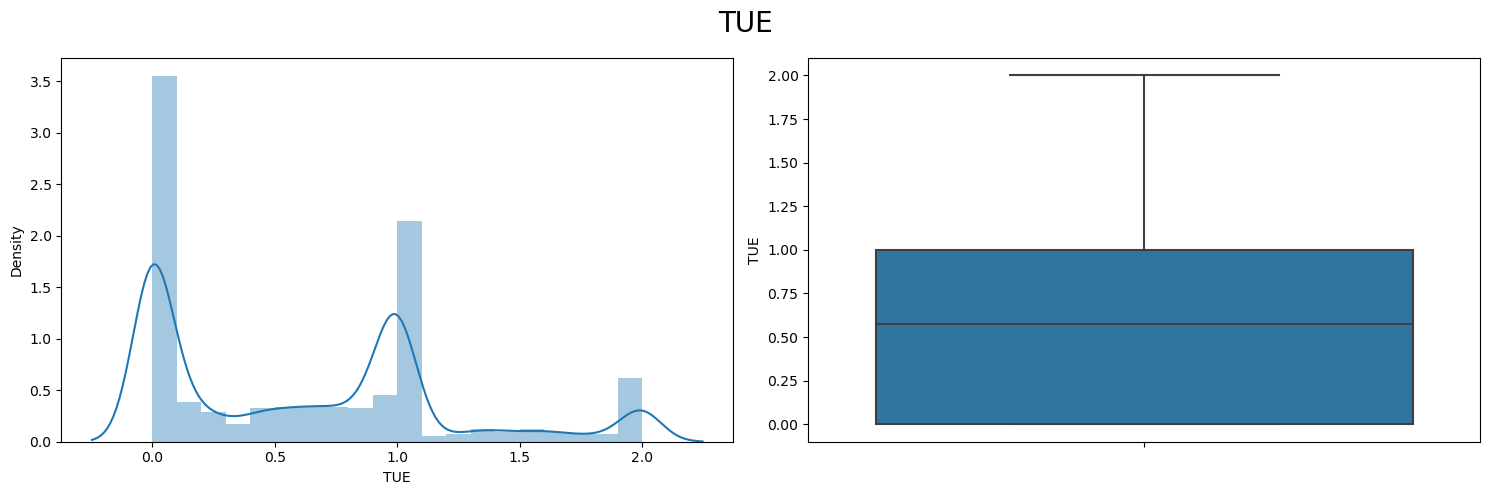

In [18]:
for col in num_features:
    
    plt.subplots(1,2,figsize=(15,5))
    
    plt.subplot(1,2,1)  
    sns.distplot(train_df[col],
                 bins=20)
    
    plt.subplot(1,2,2)
    sns.boxplot(data=train_df,
                y=col)
    
    plt.suptitle(f'{col}',fontsize=20)
    
    plt.tight_layout()
    plt.show()

- `Age`, `Height`, and `Weight` look like they are normally distributed with some skewness, we are going to test their normality later
- `Age` have some outliers

## Bivariate Analysis - against Target

Let's visualize the relationship between the independent variables and the target variable.

In [19]:
# create cross tables for the categorical features
for col in cat_features:
    cross_table = pd.crosstab(train_df[col], train_df['NObeyesdad'], normalize='index')
    display(cross_table)

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Gender,,,,,,,
Female,0.155536,0.159278,0.121570,0.000768,0.387737,0.102667,0.072443
Male,0.087268,0.137577,0.158959,0.313467,0.000484,0.131289,0.170956


NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
family_history_with_overweight,,,,,,,
no,0.387019,0.345085,0.012821,0.001335,0.000267,0.201923,0.051549
yes,0.063124,0.105207,0.168214,0.190608,0.237745,0.098213,0.136887


NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
FAVC,,,,,,,
no,0.208333,0.278716,0.052365,0.030405,0.000563,0.126126,0.303491
yes,0.113423,0.136287,0.148404,0.168265,0.213097,0.116057,0.104467


NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
CAEC,,,,,,,
Always,0.073222,0.575314,0.133891,0.020921,0.002092,0.125523,0.069038
Frequently,0.490291,0.285599,0.022654,0.004854,0.001214,0.110437,0.084951
Sometimes,0.072337,0.117805,0.158708,0.183924,0.230589,0.106966,0.129671
no,0.028674,0.129032,0.028674,0.007168,0.000000,0.784946,0.021505


NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
SMOKE,,,,,,,
no,0.122654,0.148004,0.140691,0.152781,0.197046,0.117096,0.121728
yes,0.028571,0.187755,0.097959,0.465306,0.016327,0.102041,0.102041


NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
SCC,,,,,,,
no,0.114145,0.145583,0.144088,0.161626,0.201584,0.108515,0.124458
yes,0.337700,0.232897,0.026201,0.005822,0.000000,0.362445,0.034934


NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
CALC,,,,,,,
Frequently,0.026465,0.128544,0.143667,0.024575,0.000000,0.245747,0.431002
Sometimes,0.107527,0.128767,0.095845,0.184322,0.268552,0.130094,0.084893
no,0.172187,0.208019,0.269223,0.088708,0.000000,0.065272,0.196591


NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
MTRANS,,,,,,,
Automobile,0.078381,0.087436,0.211375,0.267119,0.000000,0.134409,0.221279
Bike,0.062500,0.437500,0.062500,0.031250,0.000000,0.281250,0.125000
Motorbike,0.105263,0.447368,0.105263,0.078947,0.000000,0.184211,0.078947
Public_Transportation,0.129802,0.153712,0.127764,0.137472,0.242464,0.109966,0.098819
Walking,0.158458,0.379015,0.053533,0.012848,0.000000,0.216274,0.179872


<Figure size 1500x500 with 0 Axes>

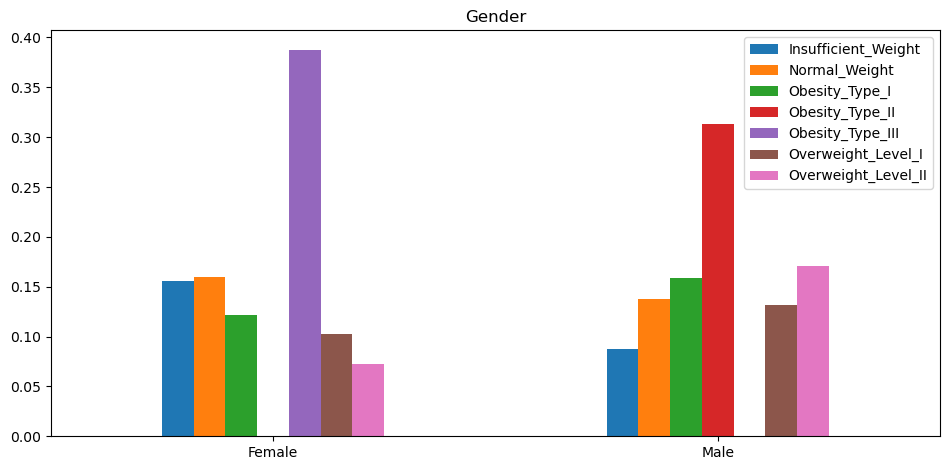

<Figure size 1500x500 with 0 Axes>

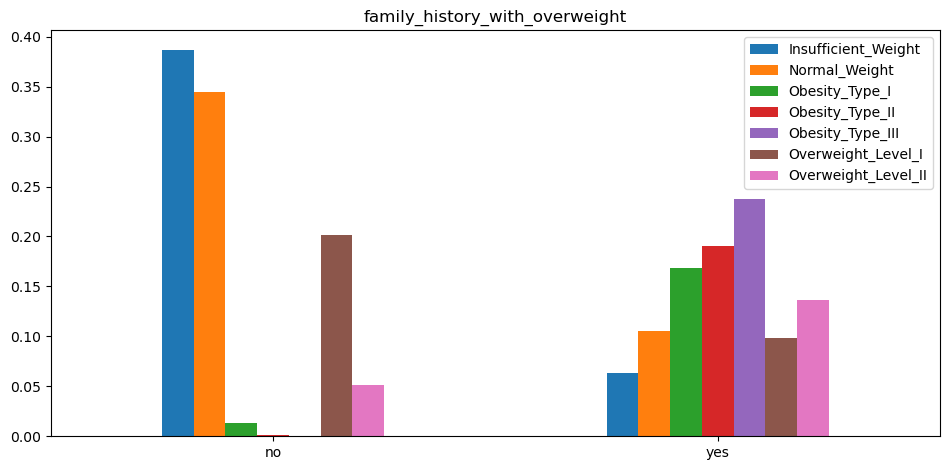

<Figure size 1500x500 with 0 Axes>

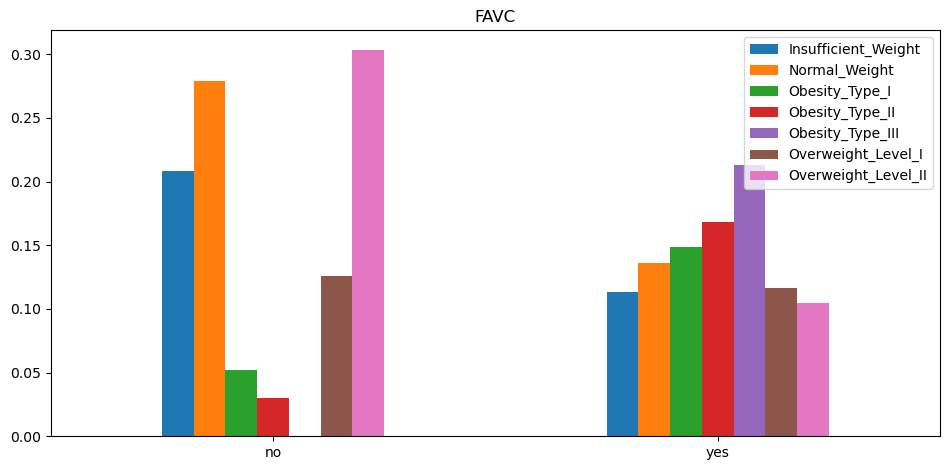

<Figure size 1500x500 with 0 Axes>

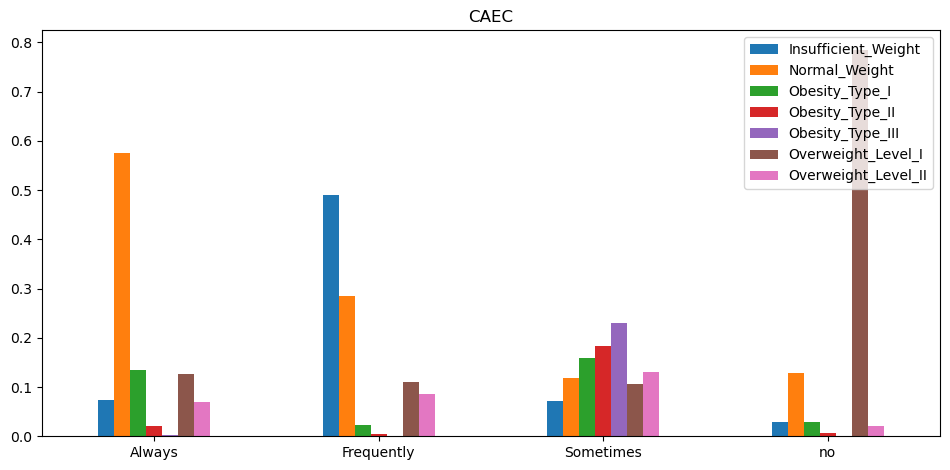

<Figure size 1500x500 with 0 Axes>

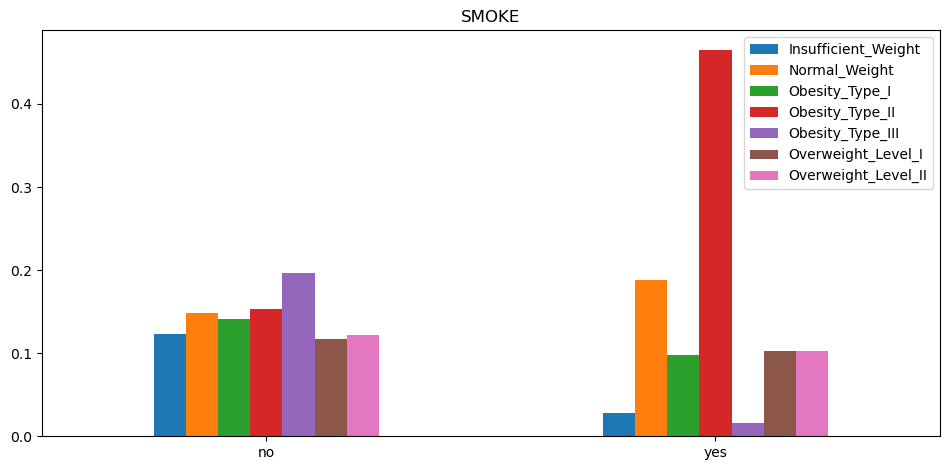

<Figure size 1500x500 with 0 Axes>

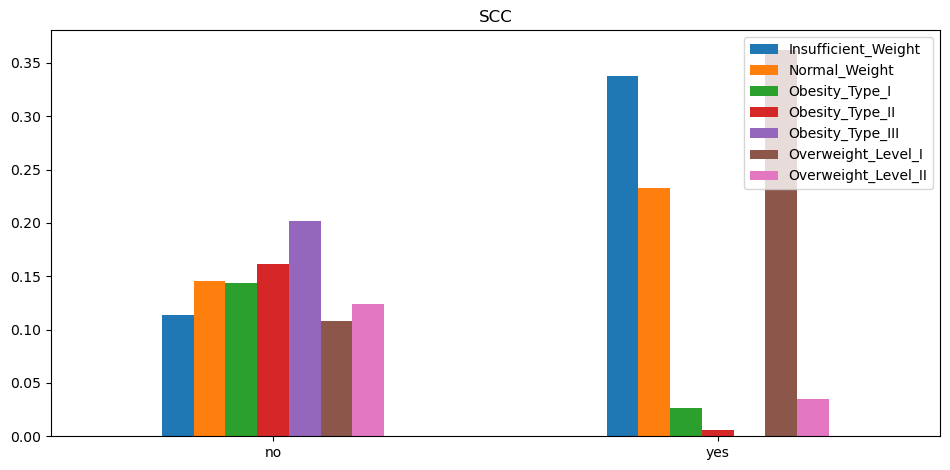

<Figure size 1500x500 with 0 Axes>

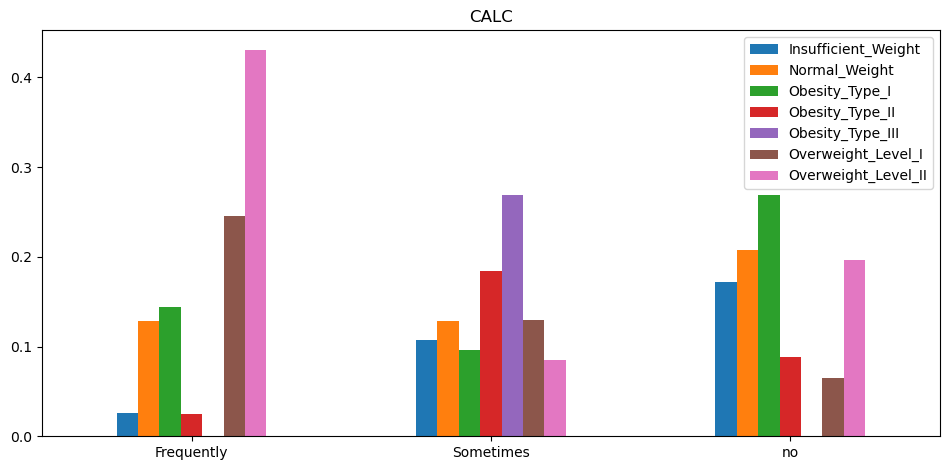

<Figure size 1500x500 with 0 Axes>

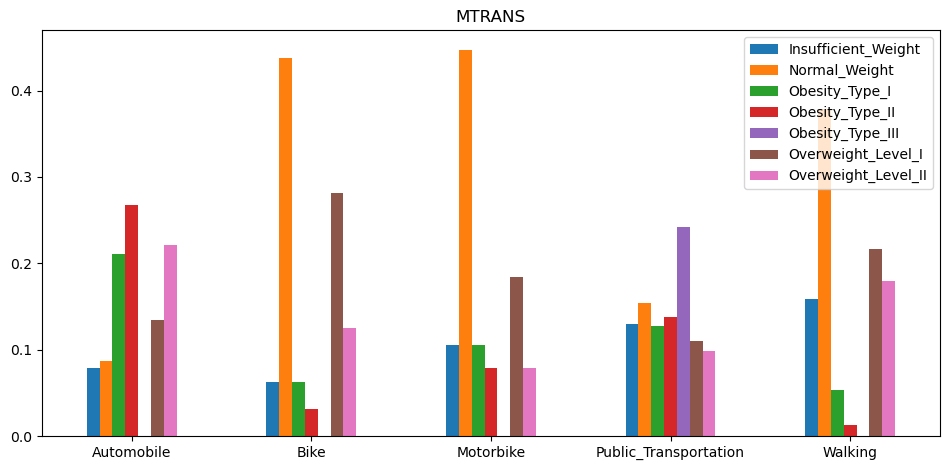

In [20]:
for col in cat_features:
    cross_table = pd.crosstab(train_df[col], train_df['NObeyesdad'], normalize='index')
    
    plt.figure(figsize=(15,5))
    cross_table.plot(kind='bar')
    plt.title(f'{col}')
    plt.xlabel('')
    plt.xticks(rotation=0)
    plt.legend(loc='upper right')
    
    plt.tight_layout(rect=[0,0,1.5,1])
    plt.show()

- Obesity Type II is most common among males, while Obesity Type III is most common among females
- People who do not have family history of overweight tend to fall into Insufficient Weight and Normal Weight categories, those who have family history of overweight are more likely to suffer from Obesity_Type_III
- Overweight Level II and Normal Weight are most common among people who do not frequently consume high caloric food. Obesity Type III is most common among people who do consume high caloric food frequently
- People who always consume food between their meals are more likely to be Normal Weight, Insufficient Weight is most common among people who fequently consume food between meals. Obesity Level III and Overweight Level I are most common among people who sometimes and nenver consume food between meals respectively. It seems like consuming some food between meals is healthy
- Individuals who do not smoke exhibit a relatively uniform distribution across different categories of obesity, with a marginally higher prevalence of Obesity Type III. Obesity Type II significantly outweighs other categories among people who do smoke
- People are more prone to monitor their calories consumption when they have Insufficient Weight and Overweight Level I. People who have Obesity Type II and III rarely monitor the calories they consume
- Obesity Type III are often found in people who frequently drink alcohol
- people who have Normal Weight tend to choose motorbikes, bikes, and walking as their transportation methods. While people who suffer from some kind of obesity tend to use automobiles and public transportations

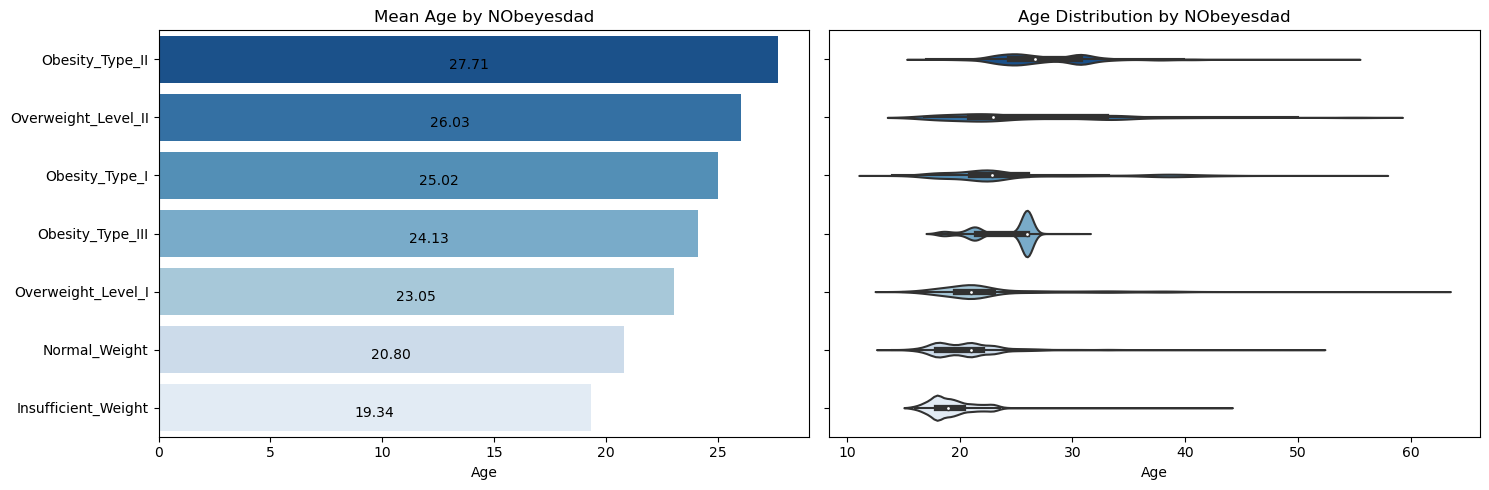

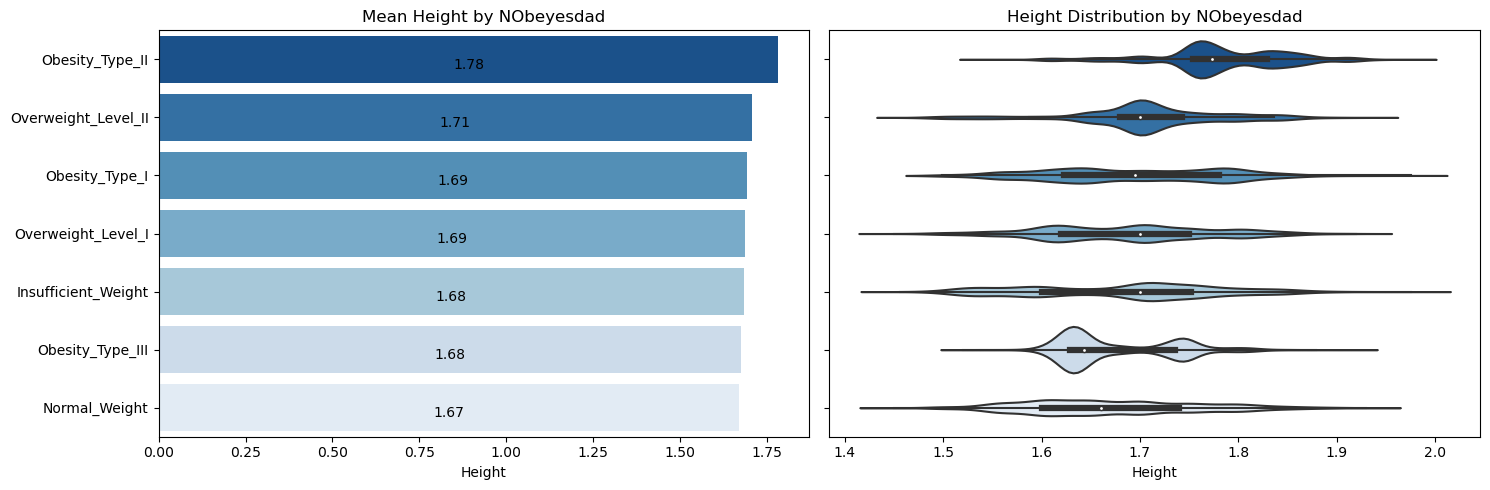

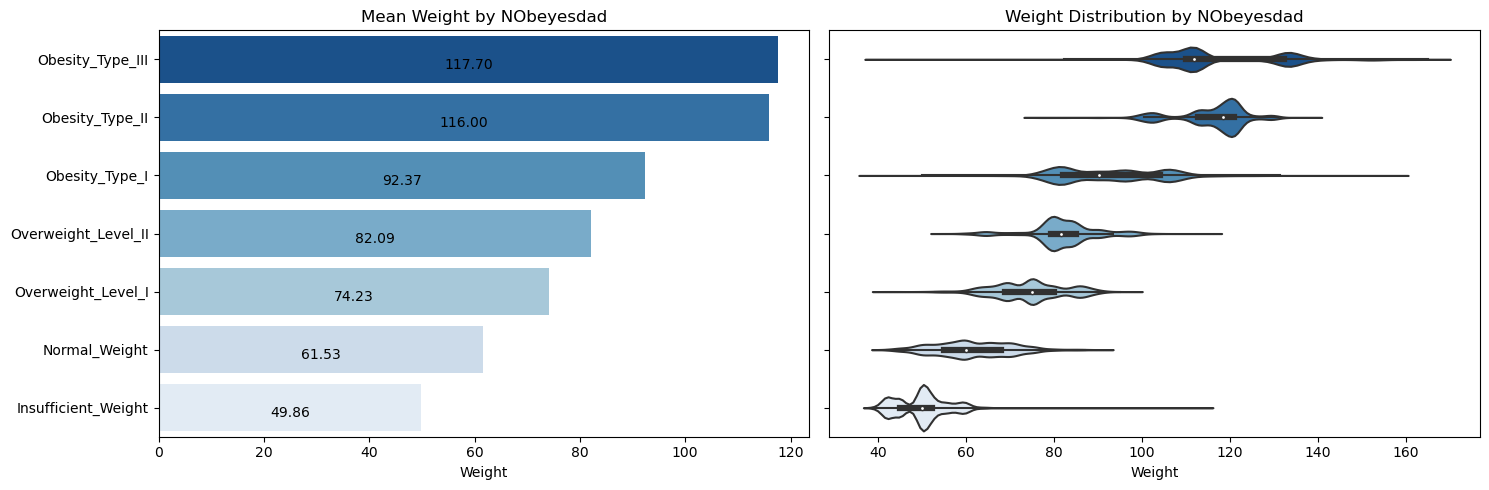

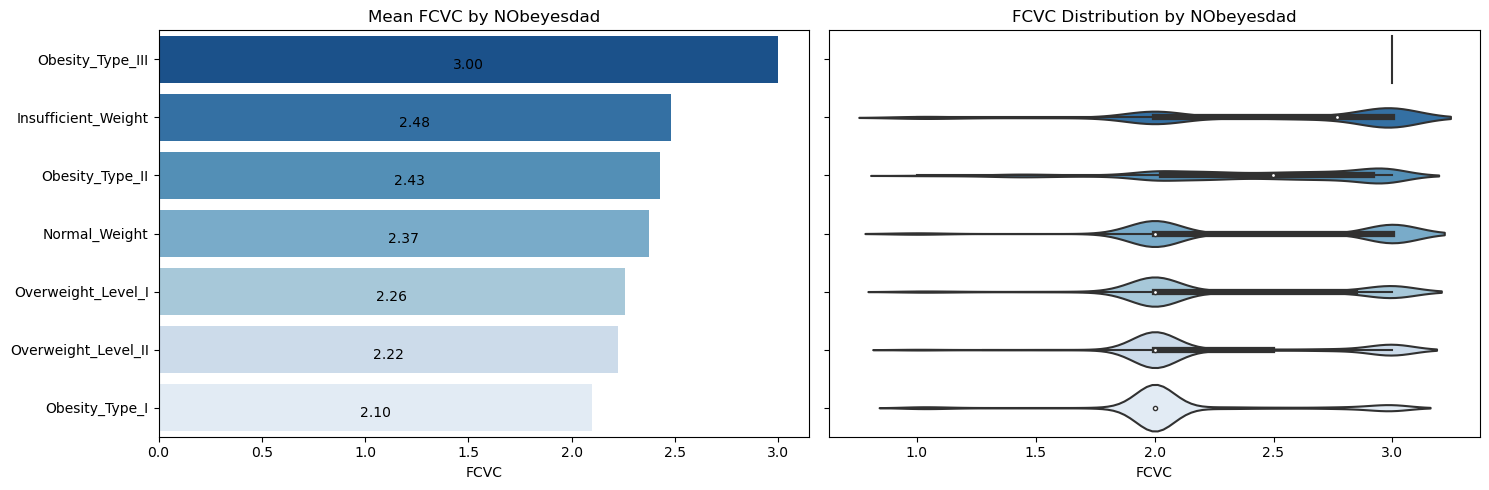

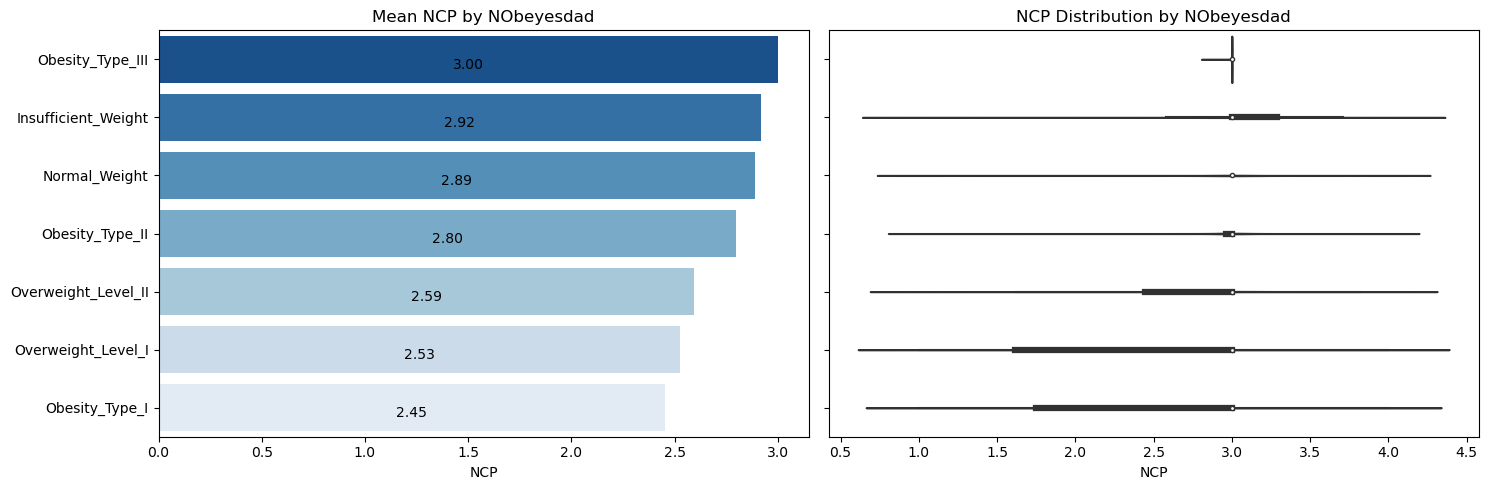

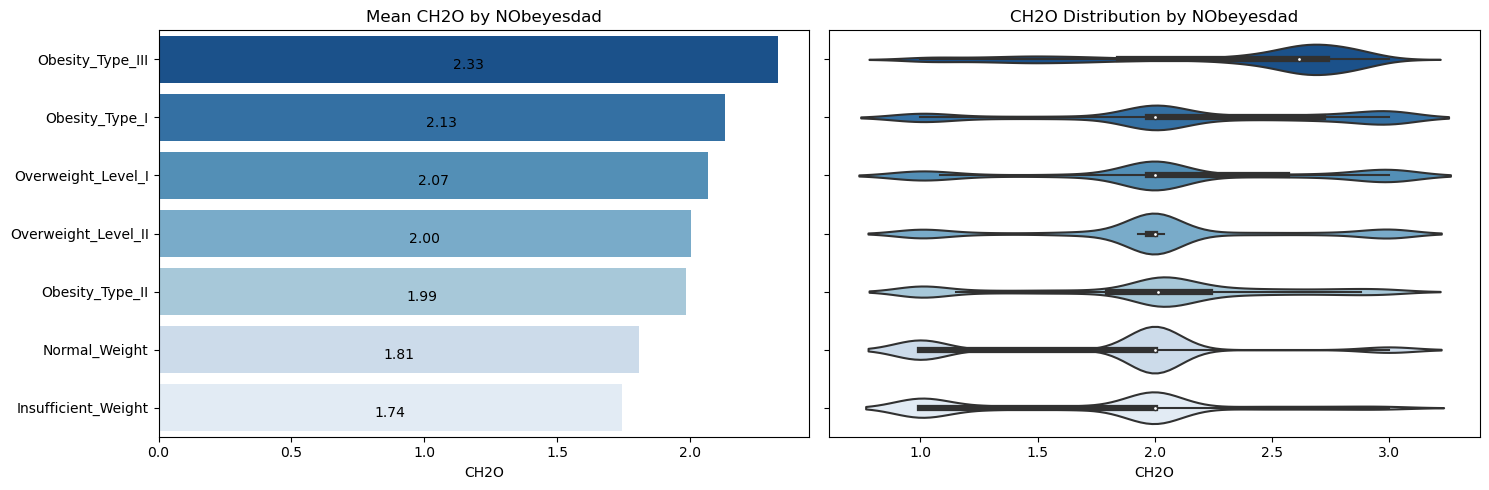

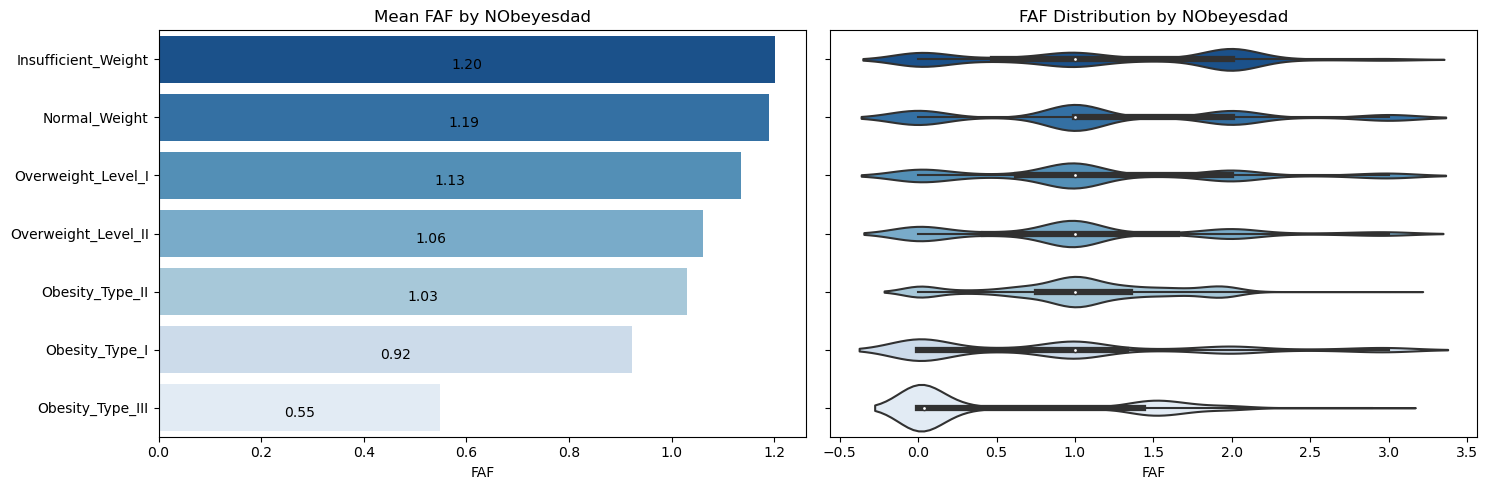

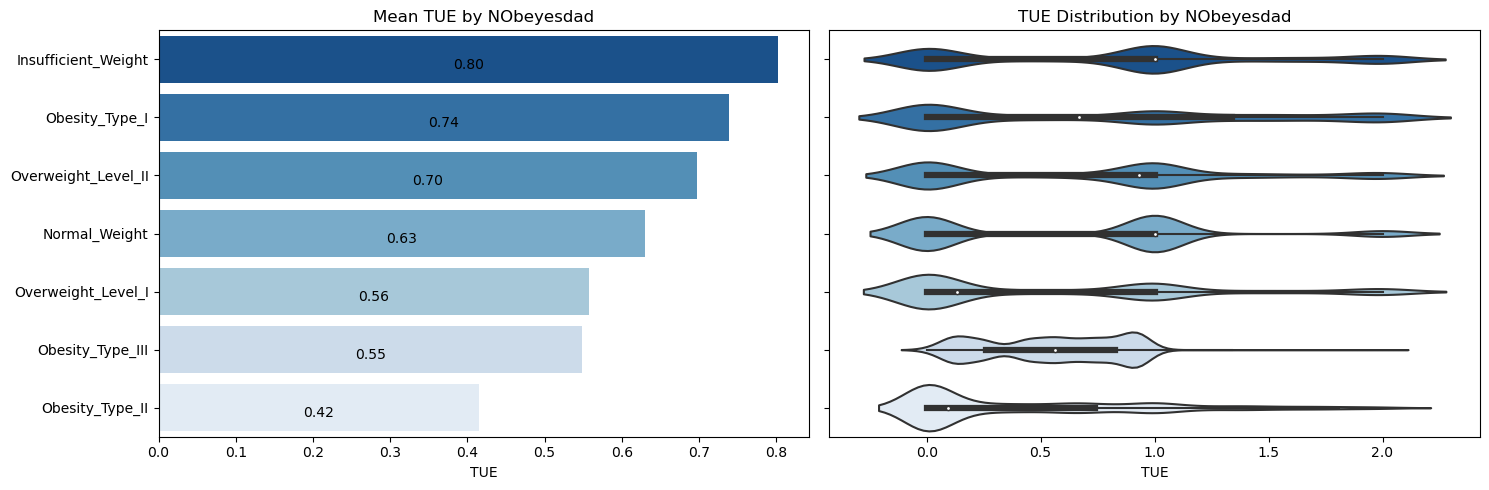

In [21]:
# visualize numeric features against the target
for col in num_features:
    
    # aggregate the mean age
    means_df = train_df.groupby('NObeyesdad')[col].mean().reset_index().sort_values(by=col, ascending=False)

    # create a figure and a set of subplots with shared y-axis
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), sharey=True)

    barplot=sns.barplot(data=means_df, 
                x=col, 
                y='NObeyesdad', 
                ax=axes[0], 
                palette='Blues_r')
    axes[0].set_title(f'Mean {col} by NObeyesdad')

    # annotate bars
    for p in barplot.patches:
        _x = p.get_x()+p.get_width()/2
        _y = p.get_y()+p.get_height()
        value = format(p.get_width(), '.2f')
        axes[0].annotate(value, (_x, _y),
                         textcoords="offset points",
                         xytext=(0,10),
                         ha='center')
        
    sns.violinplot(data=train_df,
                   x=col,
                   y='NObeyesdad',
                   ax=axes[1],
                   order=means_df['NObeyesdad'],
                   palette='Blues_r')
    axes[1].set_title(f'{col} Distribution by NObeyesdad')

    axes[0].set_ylabel('')
    axes[1].set_ylabel('')

    plt.tight_layout()
    plt.show()

- Obesity is more common in people who are older, the most severe obesity (Obesity Type III) in average is present in people who are around 24 years old. Younger people tend to suffer more from Insufficient Weight
- Surprisingly, people who suffer from Obesity Type III consume vegetables and drink water the most, maybe they have been suggested by doctors to do so
- Physical activity frequency is negativly related to the severity of obesity, no surprise here
- People who have Insufficient Weight spend most amount of time on technology devices on average, and those who suffer from Obesity Type II spend least amount screen time. This could be related to their age

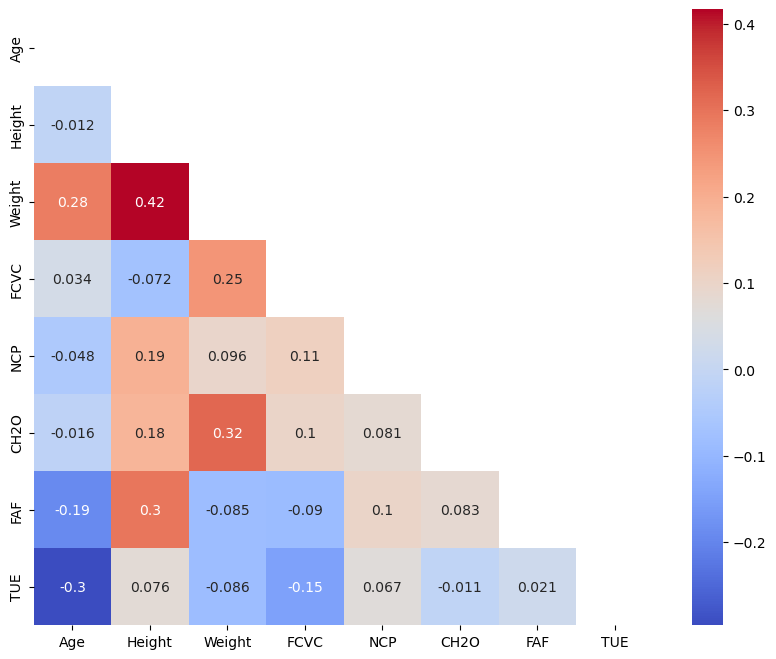

In [22]:
corr_matrix = train_df.corr()
mask = np.triu(np.ones_like(corr_matrix,dtype=bool))

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,
           mask=mask,
           annot=True,
           cmap='coolwarm')

plt.show()

- `Age` has 0.28 correlation with `Weight`, and -0.3 negatively correlated with `TUE` like we suspected before
- `Height` and `Weight` have a 0.42 correlation, and positively correlated with `FAF` (0.3) (if a person is more active, he is more likely to be tall?)
- `Weight` has a posive correlation with `FCVC` (0.25) and `CH2O`(0.32) (heavy people eat more vegetables and drink more water)

There is no multicollinearity in the dataset. So we shouldn't be concerned.

# Statistical Analysis

## Categorical Features

The Chi-sqaure test is used to determine if there is a significant association between two categorical variables. In our case, it can help you decide if variations in the categorical feature are related to the variations in the target classes.

**Hypotheses:**
- **$H_0$: There is no statistically significant difference between the feature and the classification of an individual into different obesity types.**
- **$H_1$: There is a statistically significant difference between the feature and the classification of an individual into different obesity types..**

In [28]:
# determine the p-value threshold
alpha = 0.5

# loop the chi2 test through categorical features
for feature in cat_features:
    
    # create the contigency table for each feature against the target
    contigency_table = pd.crosstab(train_df[feature], train_df['NObeyesdad'])
    
    # instantiate chi2 test
    chi2, p, _, _ = chi2_contingency(contigency_table)
    
    # check the results
    if p<alpha:
        print(f"\nThe p-value for {feature} is: {p}. We reject the null hypothesis, and there is a statistically significant difference {feature} and the classification of an individual into different obesity types.")
    else:
        print(f"\nThe p-value for {feature} is: {p}. We faield to reject the null hypothesis, and there is no statistically significant difference {feature} and the classification of an individual into different obesity types.")


The p-value for Gender is: 0.0. We reject the null hypothesis, and there is a statistically significant difference Gender and the classification of an individual into different obesity types.

The p-value for family_history_with_overweight is: 0.0. We reject the null hypothesis, and there is a statistically significant difference family_history_with_overweight and the classification of an individual into different obesity types.

The p-value for FAVC is: 0.0. We reject the null hypothesis, and there is a statistically significant difference FAVC and the classification of an individual into different obesity types.

The p-value for CAEC is: 0.0. We reject the null hypothesis, and there is a statistically significant difference CAEC and the classification of an individual into different obesity types.

The p-value for SMOKE is: 6.396981747148517e-44. We reject the null hypothesis, and there is a statistically significant difference SMOKE and the classification of an individual into diff

All the categorical features exhibit some predictive information for our target variable.

## Numerical Features

There is a caveat in performing statistical tests for numerical features, we first need to test for assumptions for normality and Homogeneity of variances to choose the suitable testing method.

**Hypotheses (Normality):**
- **$H_0$: The feature is normally distributed.**
- **$H_1$: The feature is not normally distributed.**

In [33]:
for feature in num_features:

    # instantiate the Shapiro Test
    shapiro_test = stats.shapiro(train_df[feature])
        
    # check for p-value
    if p<alpha:
        print(f"\nThe p-value for {feature} is: {shapiro_test.pvalue}. We reject the null hypothesis, and the feature is not normally distributed.")
    else:
        print(f"\nThe p-value for {feature} is: {shapiro_test.pvalue}. We failed to reject the null hypothesis, and the feature is normally distributed.")


The p-value for Age is: 0.0. We reject the null hypothesis, and the feature is not normally distributed.

The p-value for Height is: 5.66251497964832e-33. We reject the null hypothesis, and the feature is not normally distributed.

The p-value for Weight is: 0.0. We reject the null hypothesis, and the feature is not normally distributed.

The p-value for FCVC is: 0.0. We reject the null hypothesis, and the feature is not normally distributed.

The p-value for NCP is: 0.0. We reject the null hypothesis, and the feature is not normally distributed.

The p-value for CH2O is: 0.0. We reject the null hypothesis, and the feature is not normally distributed.

The p-value for FAF is: 0.0. We reject the null hypothesis, and the feature is not normally distributed.

The p-value for TUE is: 0.0. We reject the null hypothesis, and the feature is not normally distributed.


**Hypotheses (Homogeneity of Variances):**
- **$H_0$: The variances of the feature across the target classes is homogeneous.**
- **$H_1$: The variances of the feature across the target classes is not homogeneous.**

In [35]:
for feature in num_features:
    
    # group data by obesity classes and collecting feature values in lists
    grouped_data = [group[feature].values for name, group in train_df.groupby('NObeyesdad')]
    
    # instantiate the Levene's Test
    levene_test = levene(*grouped_data)
    
    # check p-value
    if p<alpha:
        print(f"\nThe p-value for {feature} is: {levene_test.pvalue}. We reject the null hypothesis, and the vairances of the feture across the target classes is not homogeneous.")
    else:
        print(f"\nThe p-value for {feature} is: {levene_test.pvalue}. We failed to reject the null hypothesis, and the vairances of the feture across the target classes is homogeneous.")


The p-value for Age is: 0.0. We reject the null hypothesis, and the vairances of the feture across the target classes is not homogeneous.

The p-value for Height is: 7.868099346722452e-294. We reject the null hypothesis, and the vairances of the feture across the target classes is not homogeneous.

The p-value for Weight is: 0.0. We reject the null hypothesis, and the vairances of the feture across the target classes is not homogeneous.

The p-value for FCVC is: 0.0. We reject the null hypothesis, and the vairances of the feture across the target classes is not homogeneous.

The p-value for NCP is: 0.0. We reject the null hypothesis, and the vairances of the feture across the target classes is not homogeneous.

The p-value for CH2O is: 1.5017496471355553e-45. We reject the null hypothesis, and the vairances of the feture across the target classes is not homogeneous.

The p-value for FAF is: 9.04288753263591e-145. We reject the null hypothesis, and the vairances of the feture across th

Both assumptions of normality and homogeneity of variances are violated, and we are dealing with a multi-classification problem, Kruskal-Wallis H Test should be used here.

When using the **Kruskal-Wallis H Test** to evaluate the distribution of a numerical feature across different classes in a multiclass classification problem, the hypotheses focus on the median values and the overall distribution shapes of the groups. This test is particularly useful when the data do not meet the assumptions required for parametric tests like ANOVA, such as normality and homogeneity of variances.

**Null Hypothesis:**

- **$H_0$: The distributions are identical among the groups (there is no statistically significant difference in the median of the numerical feature across the target classes).**
- **$H_1$: The distributions are different among the groups (there is statistically significant difference in the median of the numerical feature across the target classes).**

In [38]:
for feature in num_features:
    
    # group data by obesity classes and collecting feature values in lists
    grouped_data = [group[feature].values for name, group in train_df.groupby('NObeyesdad')]
    
    # instantiate the Kruskal-Wallis H Test
    kruskal_test = kruskal(*grouped_data)
    
    # check p-value
    if p<alpha:
        print(f"\nThe p-value for {feature} is: {kruskal_test.pvalue}. We reject the null hypothesis, and the distributions are different among the groups (there is a statistically significant difference in the median of the numerical feature across the target classes).")
    else:
        print(f"\nThe p-value for {feature} is: {kruskal_test.pvalue}. We failed to reject the null hypothesis, and the distributions are identical among the groups (there is no statistically significant difference in the median of the numerical feature across the target classes).")


The p-value for Age is: 0.0. We reject the null hypothesis, and the distributions are different among the groups (there is a statistically significant difference in the median of the numerical feature across the target classes).

The p-value for Height is: 0.0. We reject the null hypothesis, and the distributions are different among the groups (there is a statistically significant difference in the median of the numerical feature across the target classes).

The p-value for Weight is: 0.0. We reject the null hypothesis, and the distributions are different among the groups (there is a statistically significant difference in the median of the numerical feature across the target classes).

The p-value for FCVC is: 0.0. We reject the null hypothesis, and the distributions are different among the groups (there is a statistically significant difference in the median of the numerical feature across the target classes).

The p-value for NCP is: 0.0. We reject the null hypothesis, and the dist

All the categorical features also exhibit some predictive information for our target variable.

# Export

In [40]:
train_df.to_csv('train_cleaned.csv', index=False)
test_df.to_csv('test_cleaned.csv',index=False)